In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [140]:
import warnings
warnings.filterwarnings('ignore')

In [141]:
df= pd.read_csv('Titanic-Dataset.csv')

data understanding

In [142]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
df.shape

(891, 12)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [145]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


data preprocessing


In [146]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [147]:
med = df['Age'].median()
df['Age'].fillna(med, inplace = True)

In [148]:
df = df.drop('Cabin', axis = 1)

In [149]:
df.shape

(891, 11)

In [150]:
df = df.drop('Embarked', axis = 1)

In [151]:
df.shape

(891, 10)

In [152]:
df['Sex'] = df['Sex'].map({'male': 0, 'female':1})

data visualization 

In [153]:
numeric_cols = ['Fare', 'Age']


In [154]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500


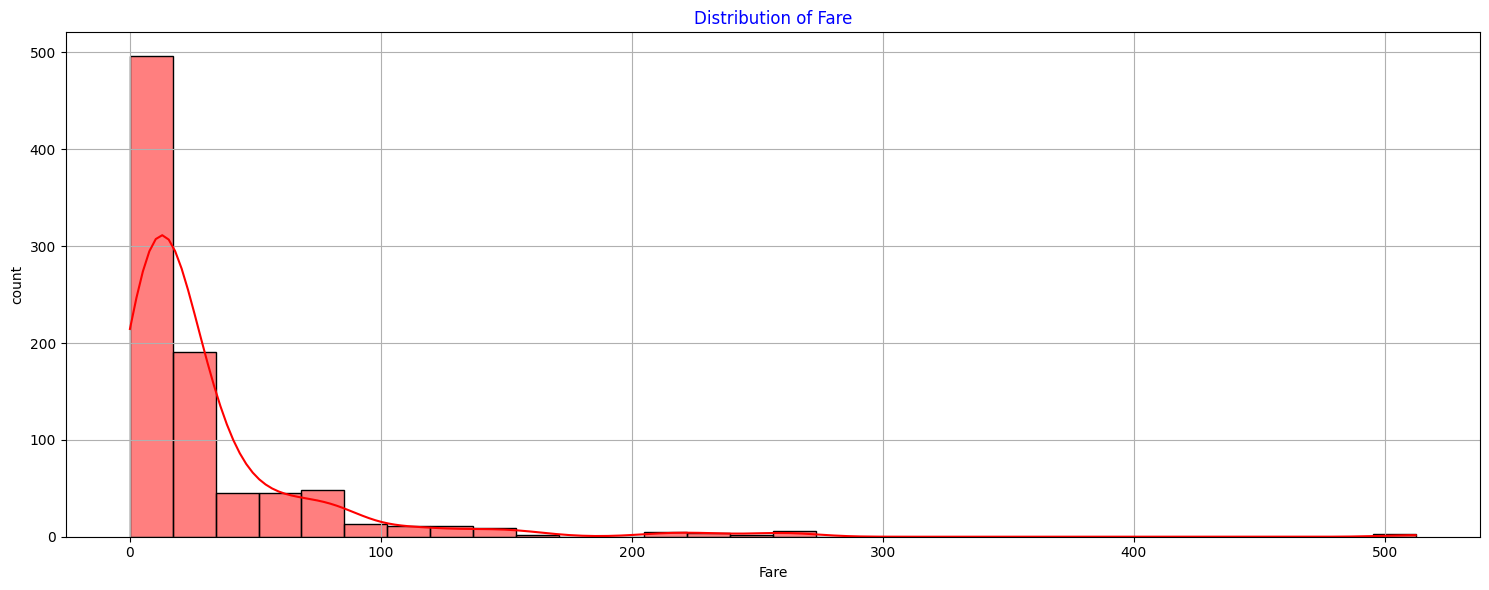

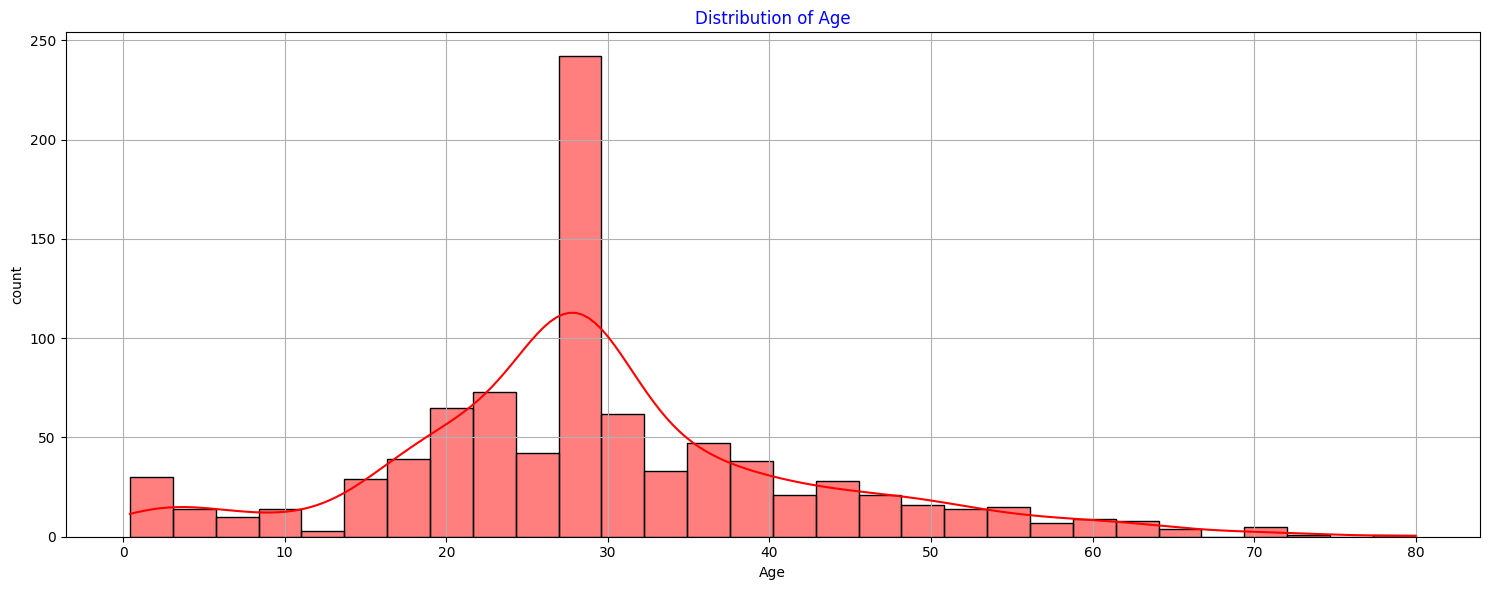

In [166]:
for col in numeric_cols:
    plt.figure(figsize=(15,6))
    sns.histplot(df[col], kde=True, bins=30, color = 'red')
    plt.title(f'Distribution of {col}', color ='blue')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [156]:
cat_cols = ['Sex', 'Survived']

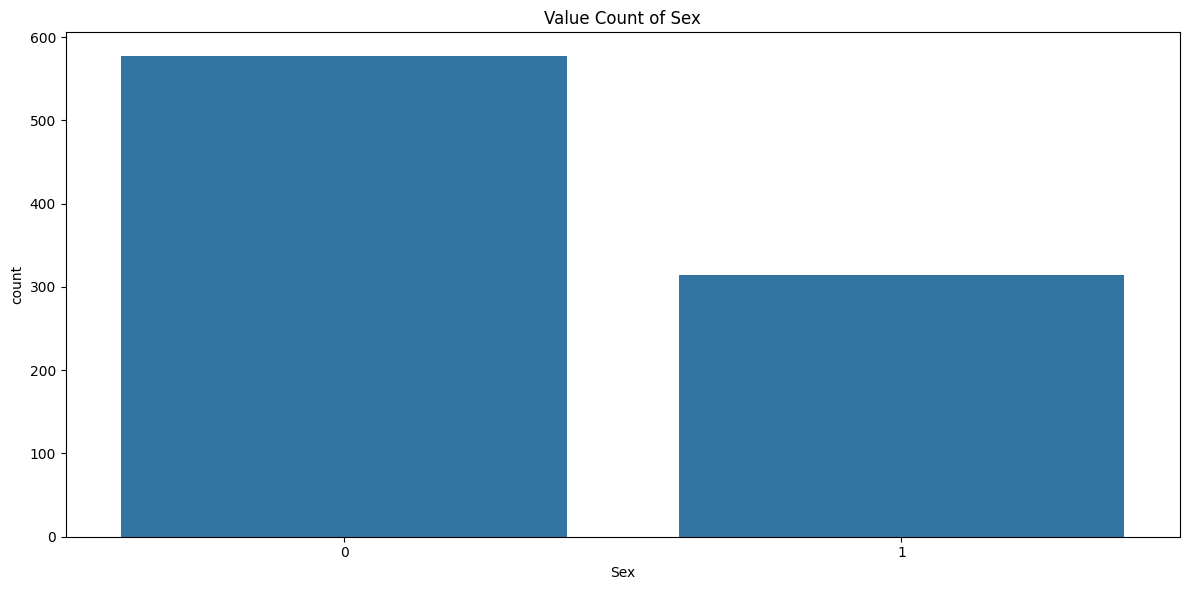

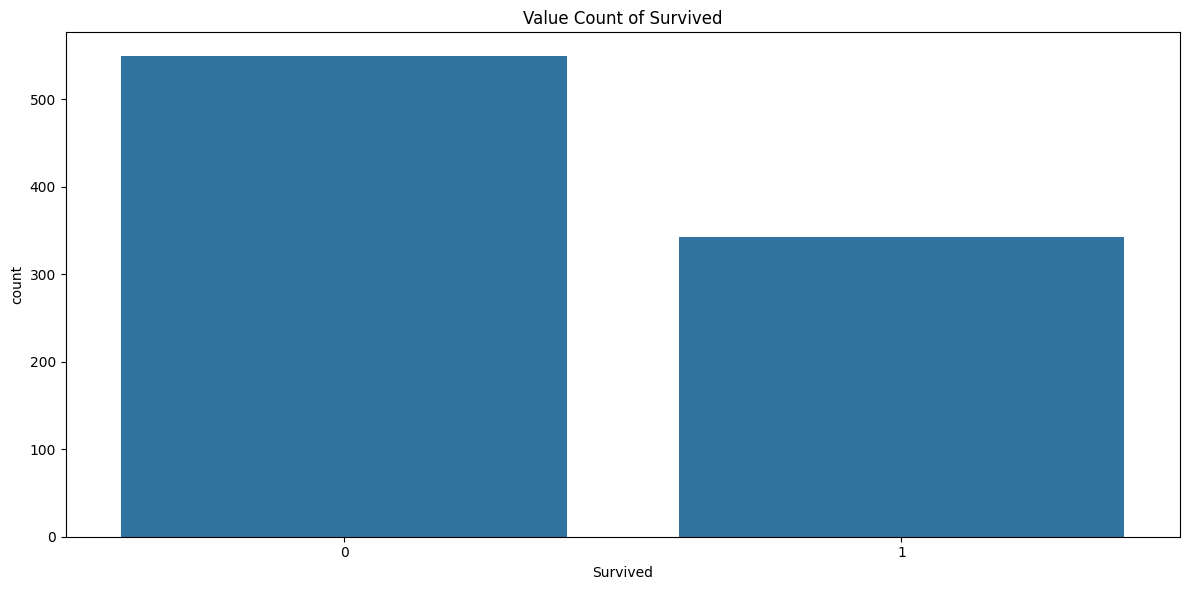

In [167]:
for col in cat_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col, data= df)
    plt.title(f'Value Count of {col}')
    plt.tight_layout()
    plt.show()

In [158]:
target = df['Survived']

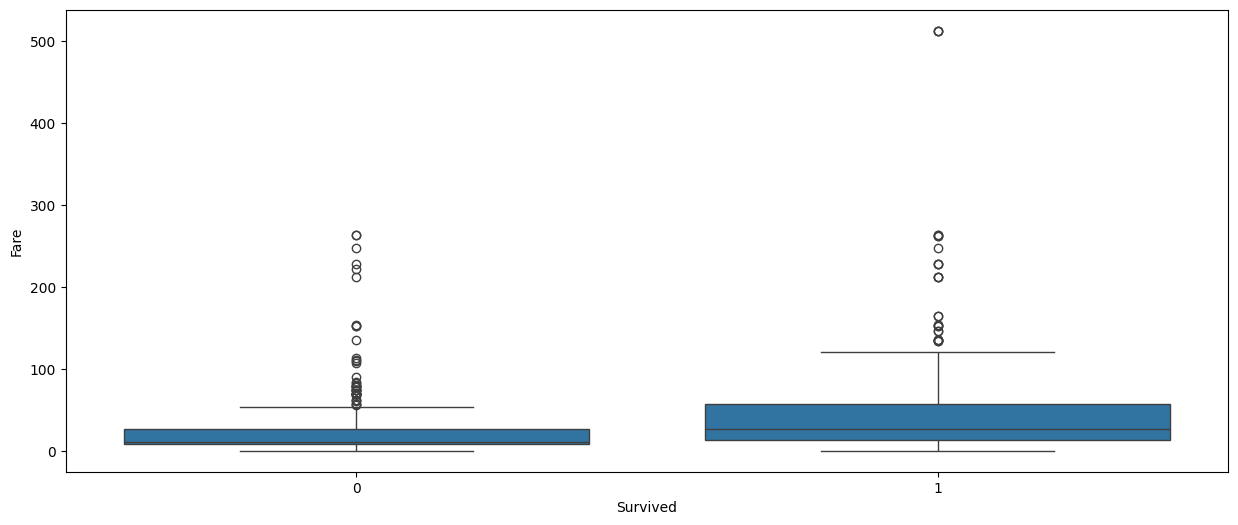

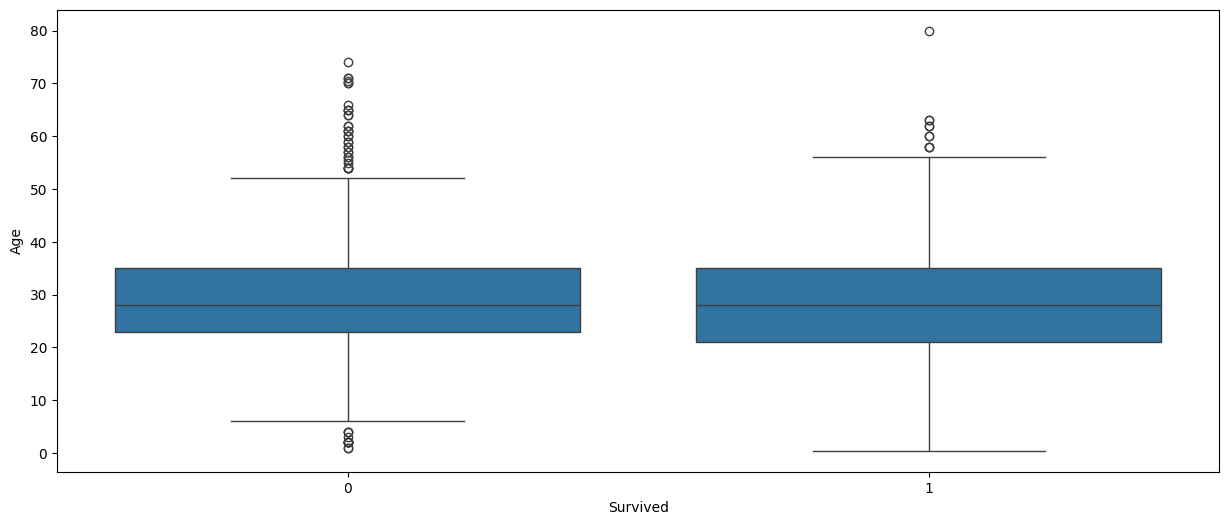

In [168]:
for col in numeric_cols:
    plt.figure(figsize=(15,6))
    sns.boxplot(x= target, y = col, data=df)
   # plt.tight_layout()
    #plt.show

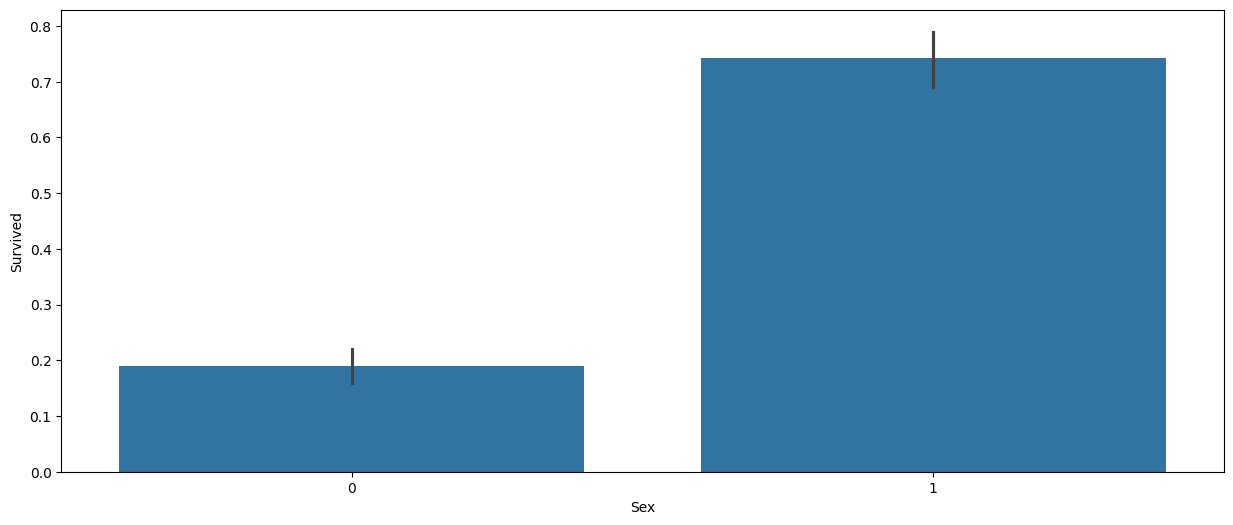

In [170]:
plt.figure(figsize=(15,6))
sns.barplot(x= 'Sex', y = 'Survived',  data = df)
plt.show()

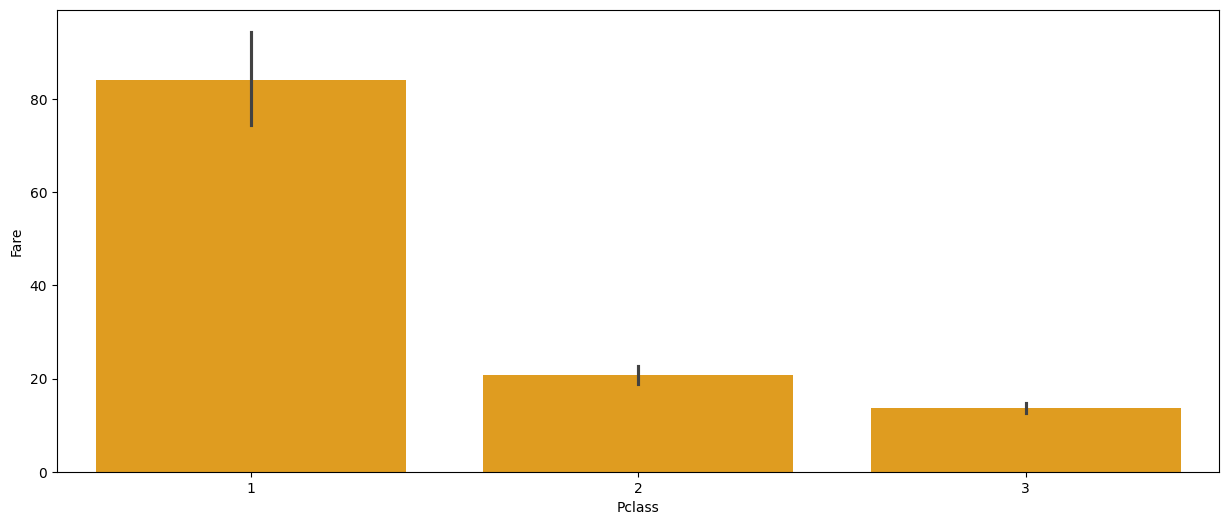

In [175]:
plt.figure(figsize=(15,6))
sns.barplot(x= 'Pclass', y = 'Fare',  data = df, color = 'orange')
plt.show()

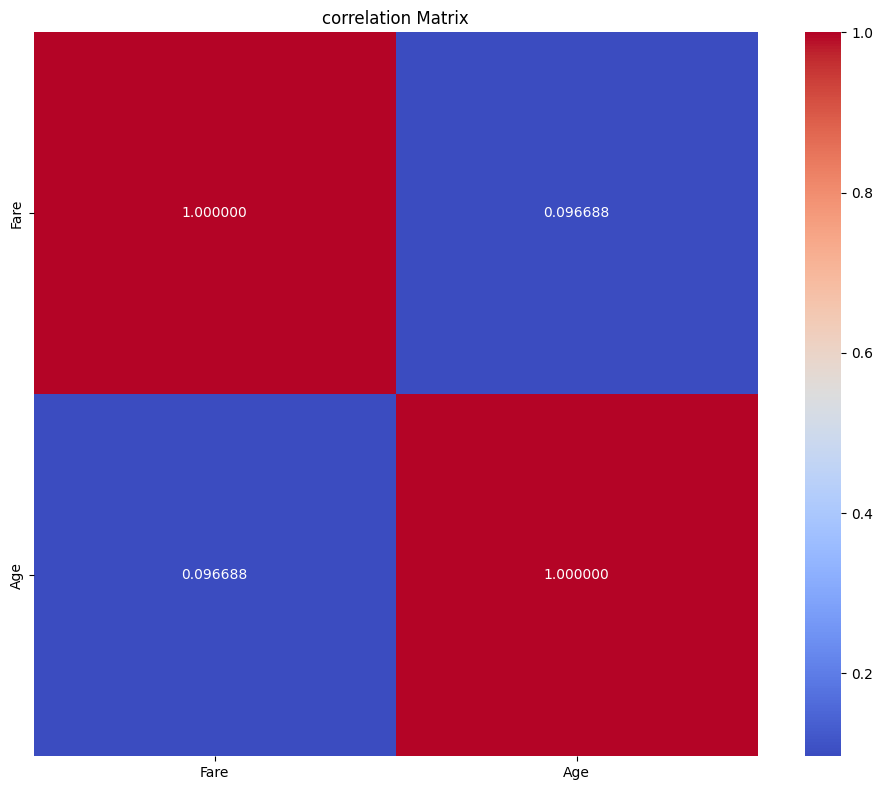

In [ ]:
#heatmap of correlation
plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot = True, cmap='coolwarm', fmt = "2f", square=True)
plt.title("correlation Matrix")
plt.tight_layout()
plt.show()

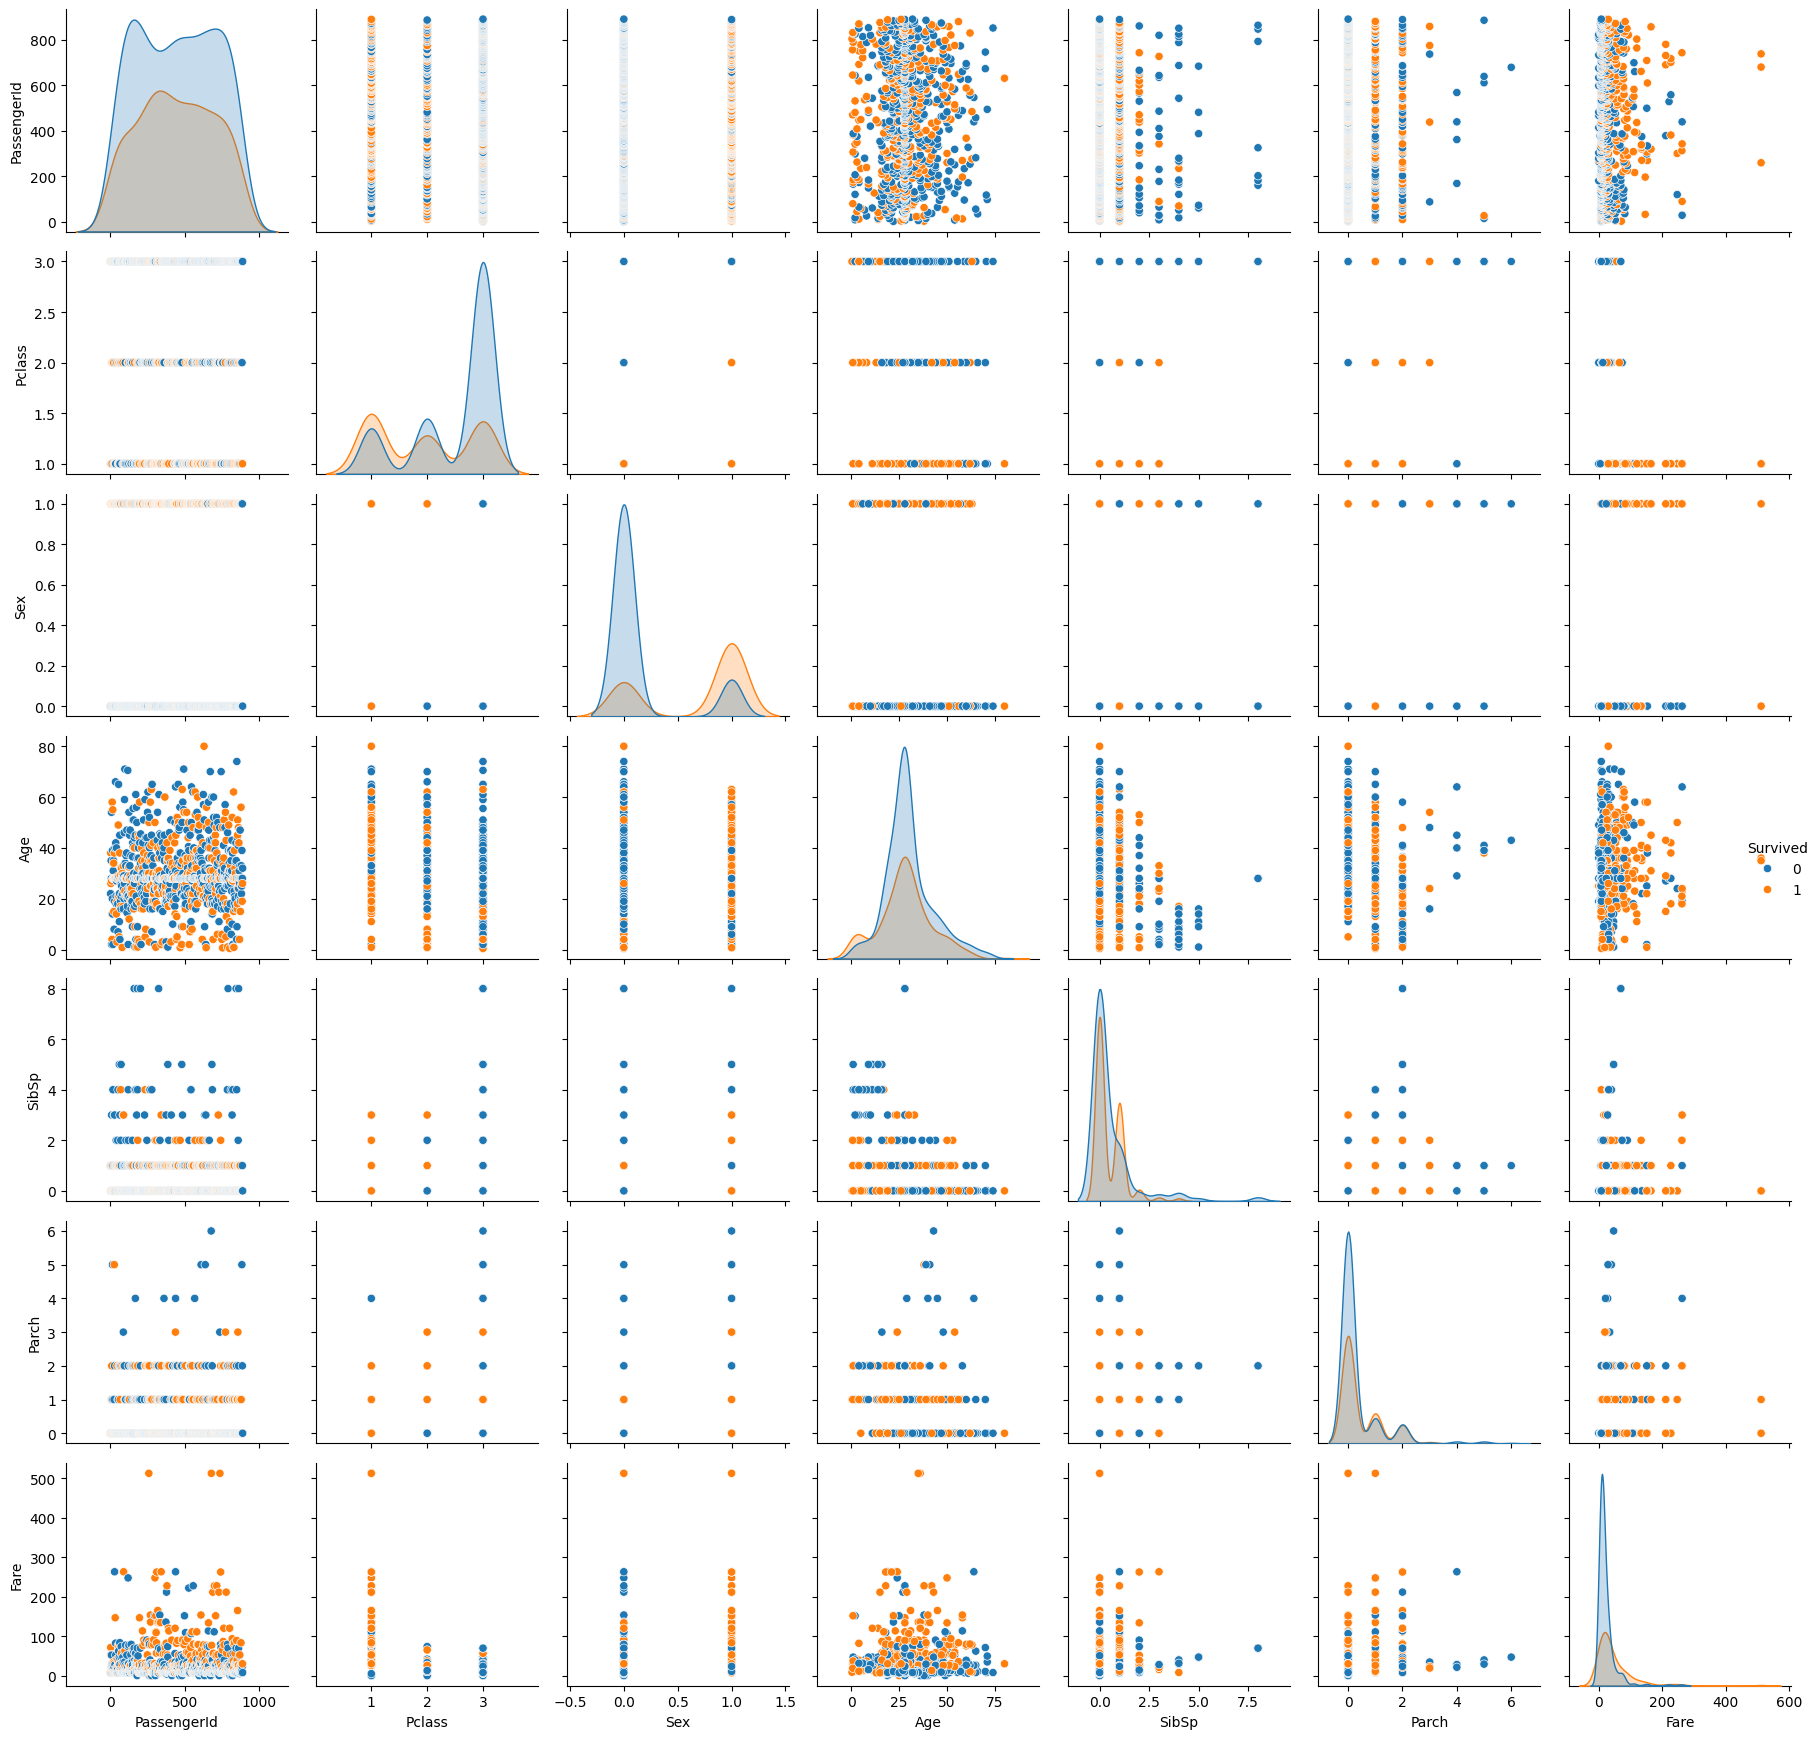

In [182]:
#pairplot
sns.pairplot(df,hue = 'Survived',diag_kind='kde')
plt.tight_layout()
plt.show()

Feature Engineering

In [184]:
new_df= pd.read_csv('Titanic-Dataset.csv')

In [185]:
# 1. Encode 'Sex'
new_df['Sex_encoded'] = df['Sex'].map({'male': 0, 'female': 1})

# 2. Extract title from name
new_df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 3. Family size
new_df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 4. Binning Fare
new_df['Fare_bin'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4])

# 5. Age missing -> fill + bin
new_df['Age'] = df['Age'].fillna(df['Age'].median())
new_df['Age_bin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Mid-Age', 'Senior'])

# 6. Drop high-cardinality or irrelevant features
new_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [186]:
new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encoded,Title,FamilySize,Fare_bin,Age_bin
0,1,0,3,male,22.0,1,0,7.2500,S,NaN,Mr,2,1,Adult
1,2,1,1,female,38.0,1,0,71.2833,C,NaN,Mrs,2,4,Adult
2,3,1,3,female,26.0,0,0,7.9250,S,NaN,Miss,1,2,Adult
3,4,1,1,female,35.0,1,0,53.1000,S,NaN,Mrs,2,4,Adult
4,5,0,3,male,35.0,0,0,8.0500,S,NaN,Mr,1,2,Adult


In [187]:
new_df.to_csv("new_titanic.csv", index = False)